# Парная линейная регрессия

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
yndx = pd.read_csv('К лабораторной 1.1/YNDX_101001_171001.txt')
sber = pd.read_csv('К лабораторной 1.1/SBER_101001_171001.txt')

In [144]:
yndx.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,YNDX,D,20140604,0,1170.0,35146
1,YNDX,D,20140605,0,1145.1,24973
2,YNDX,D,20140606,0,1163.0,7889
3,YNDX,D,20140609,0,1172.1,7304
4,YNDX,D,20140610,0,1170.0,3207


In [145]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [159]:
res = pd.merge(sber, yndx, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20140604,0,87.81,118784670,YNDX,D,0,1170.0,35146
1,SBER,D,20140605,0,87.43,136633680,YNDX,D,0,1145.1,24973
2,SBER,D,20140606,0,89.00,127884670,YNDX,D,0,1163.0,7889
3,SBER,D,20140609,0,88.89,84744280,YNDX,D,0,1172.1,7304
4,SBER,D,20140610,0,88.99,85841300,YNDX,D,0,1170.0,3207


In [160]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

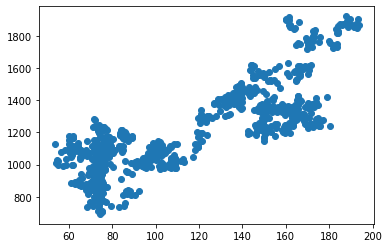

In [161]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [162]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step<max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = abs(old_err - new_err) 
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors


In [163]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 31476.217880006338


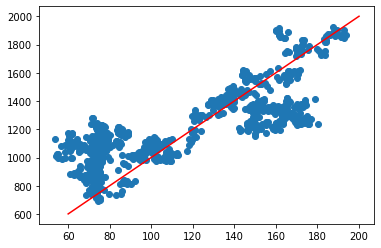

In [164]:
X0 = np.linspace(60, 200, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [165]:
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 31368.655457611672


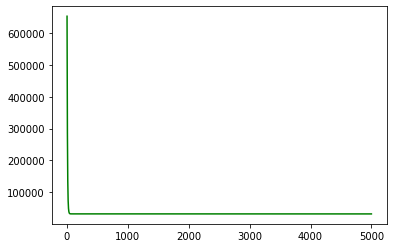

In [167]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()